# Autoencoders

Just Complete the ToDo Parts 

In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

In [2]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()
  
# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
                         train = True,
                         download = True,
                         transform = tensor_transform)
  
# DataLoader is used to load the dataset 
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)

C:\Users\asus\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        ''' Todo: Build a linear encoder with Linear
         layer followed by Relu activation function
         784 ==> 9 '''
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 9),
            nn.ReLU(),
        )
          
        ''' Todo: Build a linear decoder with Linear
         layer followed by Relu activation function
         The Sigmoid activation function
         outputs the value between 0 and 1
         9 ==> 784 '''
        self.decoder = nn.Sequential(
            nn.Linear(9, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid())
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [12]:
''' Todo: Initialaize model '''
model = AE()
  
''' Todo: Validation using MSE Loss function '''
loss_function = nn.MSELoss()
  
''' Todo: Use an Adam Optimizer with lr = 0.1 '''
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 0 is done.
Epoch 1 is done.
Epoch 2 is done.
Epoch 3 is done.
Epoch 4 is done.
Epoch 5 is done.
Epoch 6 is done.
Epoch 7 is done.
Epoch 8 is done.
Epoch 9 is done.
Epoch 10 is done.
Epoch 11 is done.
Epoch 12 is done.
Epoch 13 is done.
Epoch 14 is done.
Epoch 15 is done.
Epoch 16 is done.
Epoch 17 is done.
Epoch 18 is done.
Epoch 19 is done.


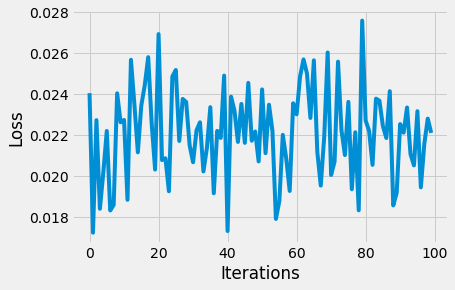

In [17]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
        
      ''' Todo: Reshaping the image to (-1, 784) '''
      image = image.reshape(-1, 784)
        
      # Output of Autoencoder
      reconstructed = model(image)
        
      ''' Todo: Calculate the loss function '''
      loss = loss_function(reconstructed,image)
        
      # The gradients are set to zero,
      # the the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      # Storing the losses in a list for plotting
      losses.append(loss.item())
    outputs.append((epochs, image, reconstructed))
    print("Epoch "+str(epoch)+ " is done.")
  
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
''' Todo: Plot the last 100 values '''
plt.plot(np.arange(0,100),losses[len(losses)-100:])

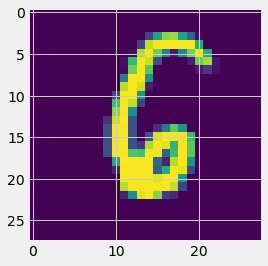

In [18]:
# Plot the first input image array
for i, item in enumerate(image):
    
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])


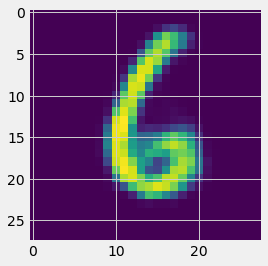

In [19]:
''' Todo: Plot the first reconstructed input image array '''  
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].detach().numpy())


# Attention Models

Just Complete the ToDo Parts 

In [23]:
# Some imports that we require to write the network.
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable

In [24]:
# Encoder for the attention network that is similar to the vanilla encoders
class Encoder(nn.Module):
  # Store the parameters
  def __init__(self, input_size, hidden_size, bidirectional = True):
    super(Encoder, self).__init__()
    self.hidden_size = hidden_size
    self.input_size = input_size
    self.bidirectional = bidirectional
    
    ''' ToDo : Create an LSTM layer '''
    self.lstm = nn.LSTM(input_size, hidden_size,1, bidirectional=bidirectional)
  
  # The Forward function
  def forward(self, inputs, hidden):
    
    ''' Todo : Pass the input through the LSTM with the provided hidden state '''
    temp_input=inputs.view(1, 1, self.input_size)
    output, hidden = self.lstm(temp_input, hidden)
    return output, hidden
    
  # This function has to be called before passing sentence through the LSTM to initialize the hidden state.  
  def init_hidden(self):
    return (torch.zeros(1 + int(self.bidirectional), 1, self.hidden_size),
      torch.zeros(1 + int(self.bidirectional), 1, self.hidden_size))
    

In [25]:
# This class is the attention based decoder
class AttentionDecoder(nn.Module):
  
  def __init__(self, hidden_size, output_size, vocab_size):
    super(AttentionDecoder, self).__init__()
    self.hidden_size = hidden_size
    self.output_size = output_size
    
    # This layer calculates the importance of the word, by using the previous decoder hidden state and the hidden state of the encoder at that particular time step
    self.attn = nn.Linear(hidden_size + output_size, 1)
    ''' Todo: The 'lstm' layer takes in concatenation of vector obtained by having a weighted sum according to attention weights and the previous word outputted '''
    temp=hidden_size + vocab_size
    self.lstm = nn.LSTM(temp, output_size)
    ''' Todo: Map the output feature space into the size of vocabulary '''
    self.final = nn.Linear(output_size, vocab_size)
  
  # The 'init_hidden' function is used in the same way as in the encoder.
  def init_hidden(self):
    return (torch.zeros(1, 1, self.output_size),
      torch.zeros(1, 1, self.output_size))
  
  # The forward function of the decoder
  def forward(self, decoder_hidden, encoder_outputs, input):
    
    # 'weights' list is used to store the attention weights
    weights = []
    for i in range(len(encoder_outputs)):
      print(decoder_hidden[0][0].shape)
      print(encoder_outputs[0].shape)
      # Pass each encoder output through the 'attn' layer along with 
      # decoder's previous hidden state by concatenating them and store 
      # them in the 'weights' list 
      weights.append(self.attn(torch.cat((decoder_hidden[0][0], 
                                          encoder_outputs[i]), dim = 1)))
      
    ''' Todo : scale weights in range (0,1) by applying softmax activation '''
#     tem1=torch.cat(weights, 1)
    normalized_weights = F.softmax(torch.cat(weights, 1), 1)
    
    # To calculate the weighted sum, we use batch matrix multiplication
    attn_applied = torch.bmm(normalized_weights.unsqueeze(1),
                             encoder_outputs.view(1, -1, self.hidden_size))
    
    input_lstm = torch.cat((attn_applied[0], input[0]), dim = 1) #if we are using embedding, use embedding of input here instead
    
    output, hidden = self.lstm(input_lstm.unsqueeze(0), decoder_hidden)
    
    output = self.final(output[0])
    
    return output, hidden, normalized_weights

In [26]:
# Testing the code
bidirectional = True
c = Encoder(10, 20, bidirectional)
a, b = c.forward(torch.randn(10), c.init_hidden())
print(a.shape)
print(b[0].shape)
print(b[1].shape)

x = AttentionDecoder(20 * (1 + bidirectional), 25, 30)
y, z, w = x.forward(x.init_hidden(), torch.cat((a,a)), torch.zeros(1,1, 30)) 
print(y.shape)
print(z[0].shape)
print(z[1].shape)
print(w)

torch.Size([1, 1, 40])
torch.Size([2, 1, 20])
torch.Size([2, 1, 20])
torch.Size([1, 25])
torch.Size([1, 40])
torch.Size([1, 25])
torch.Size([1, 40])
torch.Size([1, 30])
torch.Size([1, 1, 25])
torch.Size([1, 1, 25])
tensor([[0.5000, 0.5000]], grad_fn=<SoftmaxBackward0>)
